In [11]:
import nltk
nltk.download("all")
import tensorflow
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [12]:
df = pd.read_csv("amazon_alexa.csv" , encoding='latin-1')

In [13]:
data_v1 = df[["verified_reviews" , "feedback"]]
data_v1.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [14]:
def cleaning(df, stop_words):

    df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    # Replacing the special characters
    df['verified_reviews'] = df['verified_reviews'].str.replace('[^a-zA-Z0-9 \n\.]', '')
    # Replacing the digits/numbers
    df['verified_reviews'] = df['verified_reviews'].str.replace('d', '')
    # Removing stop words
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    return df
stop_words = stopwords.words('english')
data_v1 = cleaning(data_v1, stop_words)

<ipython-input-14-aec96a2b8568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
<ipython-input-14-aec96a2b8568>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['verified_reviews'] = df['verified_reviews'].str.replace('[^a-zA-Z0-9 \n\.]', '')
<ipython-input-14-aec96a2b8568>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['verified_reviews'] = df['v

In [15]:
data_v1.head(100)

,verified_reviews,feedback
0,love echo,1
1,love,1
2,sometimes playing game answer question correct...,1
3,ha lot fun thing. 4 yr ol learns inosaurs cont...,1
4,music,1
...,...,...
95,like far lot try yet.,1
96,love using strictly music great,1
97,love echo love size material speaker quality. ...,1
98,love,1


<function matplotlib.pyplot.show(close=None, block=None)>

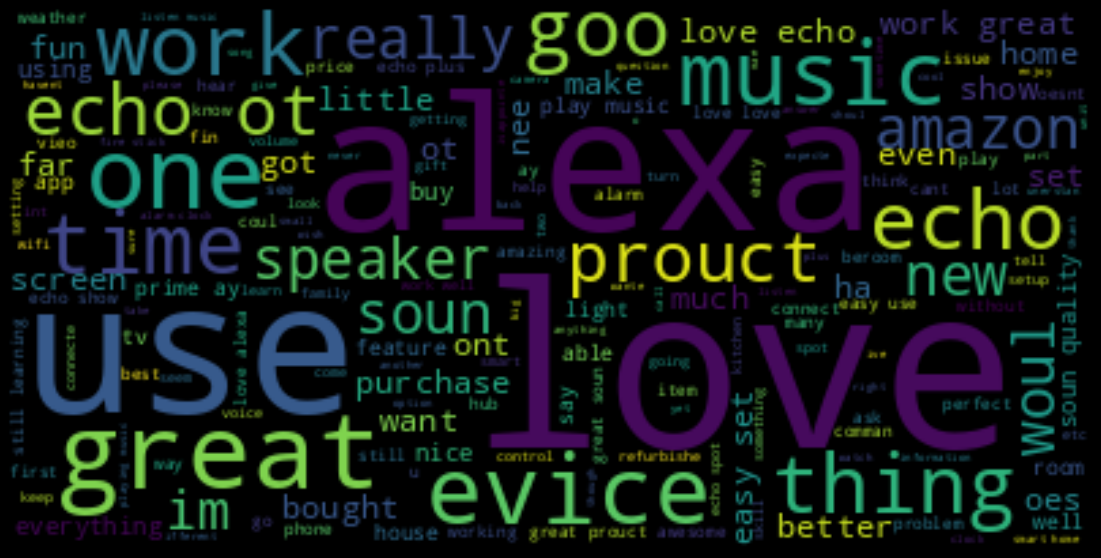

In [25]:
import wordcloud
common_words=''
for i in data_v1.verified_reviews:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wc = wordcloud.WordCloud().generate(common_words)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show
 

In [26]:
lb=LabelEncoder()
data_v1['feedback'] = lb.fit_transform(data_v1['feedback'])

<ipython-input-26-9a651333a494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1['feedback'] = lb.fit_transform(data_v1['feedback'])


In [27]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_v1['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data_v1['verified_reviews'].values)
X = pad_sequences(X)

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 174, 120)          60000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 174, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 176)               209088    
                                                                 
 dense_1 (Dense)             (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y=pd.get_dummies(data_v1['feedback'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
69/69 [==============================] - 71s 962ms/step - loss: 0.2867 - accuracy: 0.9175
Epoch 2/5
69/69 [==============================] - 62s 905ms/step - loss: 0.2152 - accuracy: 0.9293
Epoch 3/5
69/69 [==============================] - 59s 863ms/step - loss: 0.1481 - accuracy: 0.9465
Epoch 4/5
69/69 [==============================] - 60s 872ms/step - loss: 0.1113 - accuracy: 0.9596
Epoch 5/5
69/69 [==============================] - 59s 854ms/step - loss: 0.1098 - accuracy: 0.9628


In [ ]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 7s 206ms/step - loss: 0.2146 - accuracy: 0.9259


[0.21464358270168304, 0.9259259104728699]